In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("./data/insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [5]:
dataset.drop_duplicates(inplace=True)

In [6]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,expenses


In [7]:
dataset.shape

(1337, 7)

In [8]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
dataset.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [10]:
dataset.sample(5)

,age,sex,bmi,children,smoker,region,expenses
1020,51,male,37.0,0,no,southwest,8798.59
232,19,female,17.8,0,no,southwest,1727.79
1142,52,female,24.9,0,no,southeast,27117.99
178,46,female,28.9,2,no,southwest,8823.28
347,46,male,33.3,1,no,northeast,8334.46


In [11]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [12]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
dataset.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


### => Their is no missing value in the dataset.
### => Minimum Age value is 18 whereas Maximum Age value is 64.
### => Minimum BMI value is 16 whereas Maximum BMI value is 53.1.
### => Minimum number of children is 0 whereas Maximum number of children is 5.
### => Minimum expenses is 1121.87 whereas Maximum expenses is 63770.43.

In [14]:
# numerical feature
numerical_feature = [i for i in dataset.columns if dataset[i].dtype != "O"]

In [15]:
dataset[numerical_feature].head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [16]:
dataset[numerical_feature].tail()

,age,bmi,children,expenses
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95
1337,61,29.1,0,29141.36


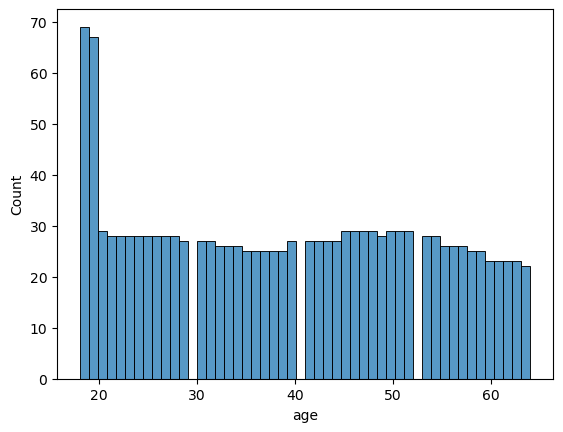

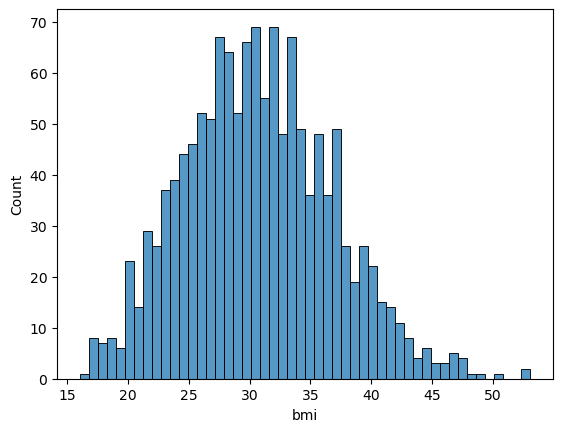

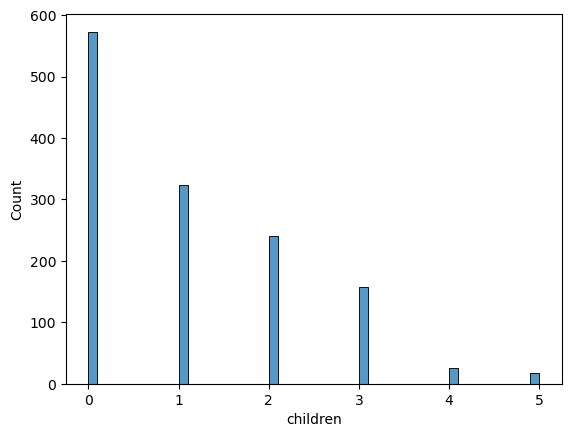

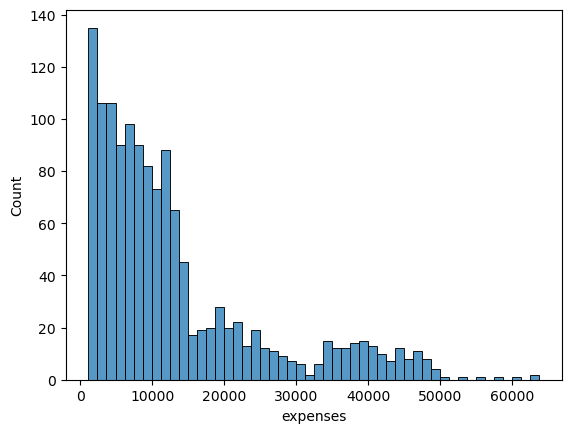

In [17]:
for i in numerical_feature:
    sns.histplot(x=dataset[i], bins=50)
    plt.show()

### => In this dataset,most of the user lies between age 18 and 19.
### => BMI follows Normal Distribution.
### => Most of the BMI ranges between 28 to 38.
### => Maximum number of user has no child.
### => Expenses follows Right Skewed Distribution.

In [18]:
categorical_feature = [i for i in dataset.columns if dataset[i].dtype == "O"]

In [19]:
dataset[categorical_feature].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [20]:
dataset[categorical_feature].tail()

,sex,smoker,region
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest
1337,female,yes,northwest


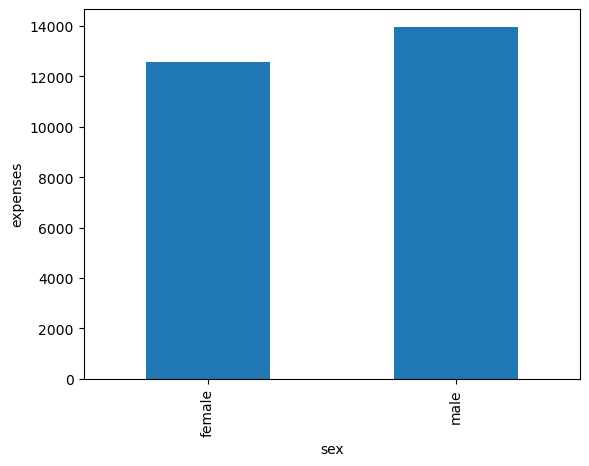

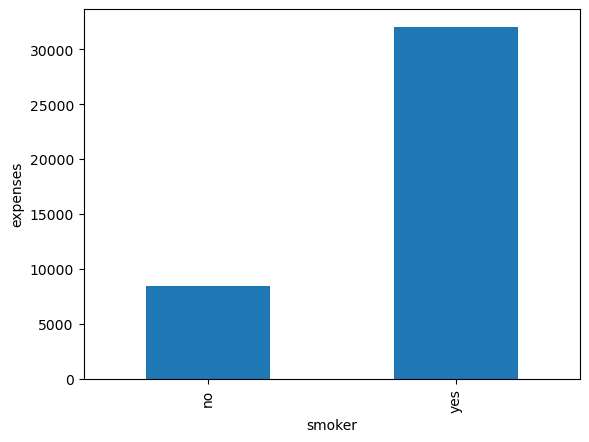

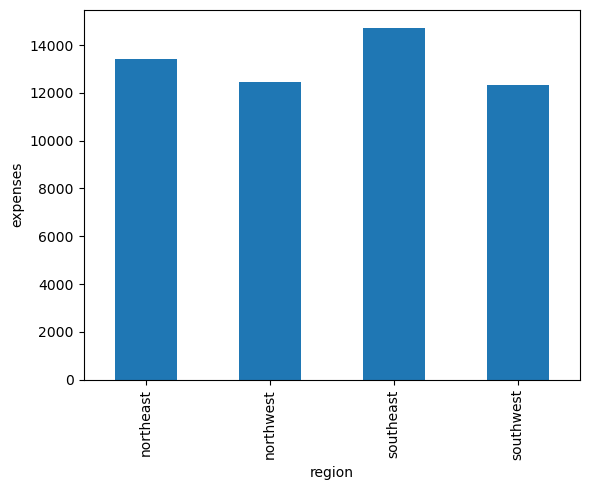

In [21]:
data = dataset.copy()
for i in categorical_feature:
    data.groupby(i)["expenses"].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel("expenses")
    plt.show()

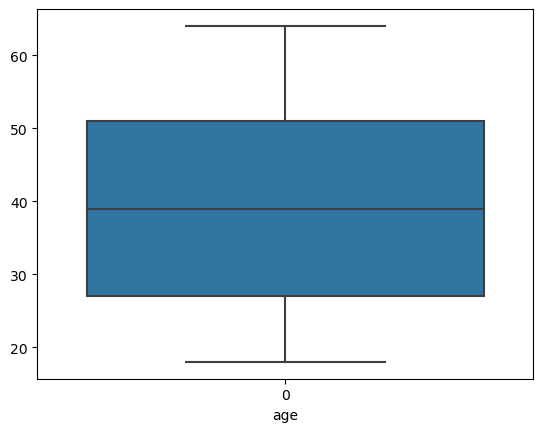

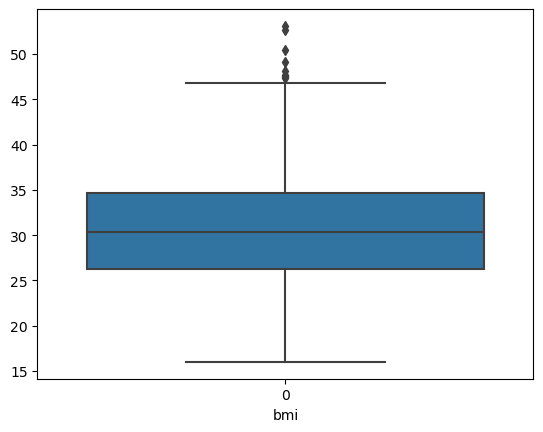

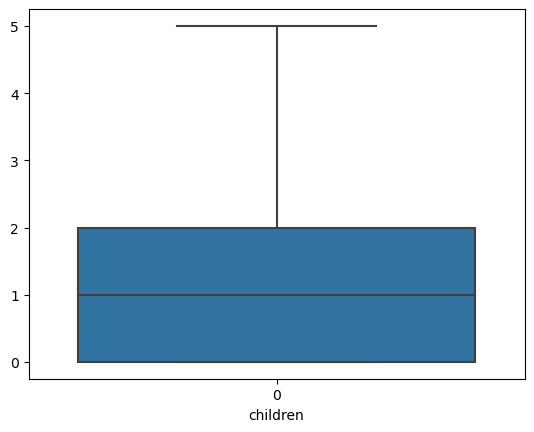

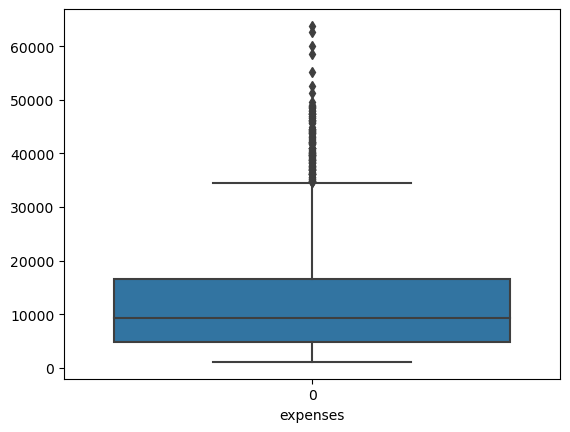

In [22]:
# Outliers

for i in numerical_feature:
    sns.boxplot(dataset[i])
    plt.xlabel(i)
    plt.show()

### => Their is no outlier in Age and Children column whereas their are some outlier in BMI Column.